<a href="https://colab.research.google.com/github/Ekagra444/gradDecPow4/blob/main/labAss1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Fabrication

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# intitialising constants
a, b, c, d, e = 2, 2, 3/4, 4, 2
noise_std = 0.3
np.random.seed(42)  # making sure same data is given to maintain consistency

# generating data
def generate_data(num_points):
    x = np.random.uniform(0, 1, num_points)
    y_true = a * np.cos(b * x) + c * np.sin(d * x) + e
    noise = np.random.normal(0, noise_std, num_points)
    y = y_true + noise
    return x, y

# # Generate dataset
# num_points = 10
# x, y = generate_data(num_points)

splitting dataset random

In [ ]:
def train_test_split(x, y, test_size=0.2):
    indices = np.arange(len(x))  # Create]ing an array of indices
    np.random.shuffle(indices)
    split_idx = int(len(x) * (1 - test_size))

    # Ensure indices are sliced correctly
    train_idx, test_idx = indices[:split_idx], indices[split_idx:]

    # Use the indices to extract train and test data
    x_train, y_train = x[train_idx], y[train_idx]
    x_test, y_test = x[test_idx], y[test_idx]

    return x_train, y_train, x_test, y_test

Model Fitting

In [ ]:
# Defining the feature mapping phi_n(x)
def phi(x, n):
    x = np.array(x)
    return np.array([x**i for i in range(n+1)]).T

# Min-max normalization ---AVOIDED
# def normalize_features(phi_x):
#     min_val = np.min(phi_x, axis=0)
#     max_val = np.max(phi_x, axis=0)
#     return (phi_x - min_val) / (max_val - min_val + 1e-8), min_val, max_val
def normalize_features(phi_x):
    mean = np.mean(phi_x, axis=0)
    std = np.std(phi_x, axis=0)
    return (phi_x - mean) / (std + 1e-8), mean, std

# Fourth power error cost function with L2 regularization
def fourth_power_error(y_true, y_pred, W, reg_lambda=0.01):
    error = y_true - y_pred
    loss = np.mean(error**4)
    reg_term = reg_lambda * np.sum(W**2)  # L2 regularization
    return loss + reg_term

# Gradient of the fourth power error with L2 regularization
def gradient_fourth_power(y_true, y_pred, phi_x, W, reg_lambda=0.01):
    error = y_pred - y_true
    grad = (4 / len(y_true)) * np.dot(phi_x.T, error**3)
    reg_grad = 2 * reg_lambda * W  # Gradient of L2 regularization
    return grad + reg_grad

# Gradient descent with normalization and gradient clipping
def fit_model(x_train, y_train, x_test, y_test, n, lr=0.00001, epochs=10000, clip_value=1.0):
    phi_train = phi(x_train, n)
    phi_test = phi(x_test, n)

    # Normalize features
    phi_train, mean, std = normalize_features(phi_train)
    phi_test = (phi_test - mean) / (std + 1e-8)

    W = np.zeros(n+1)  # Initialize weights

    train_errors, test_errors = [], []
    for epoch in range(epochs):
        # Predictions
        y_pred_train = np.dot(phi_train, W)
        y_pred_test = np.dot(phi_test, W)

        # Compute gradients
        grad = gradient_fourth_power(y_train, y_pred_train, phi_train, W)

        # Gradient clipping
        grad = np.clip(grad, -clip_value, clip_value)

        # Update weights
        W -= lr * grad

        # Compute errors
        train_error = fourth_power_error(y_train, y_pred_train, W)
        test_error = fourth_power_error(y_test, y_pred_test, W)

        train_errors.append(train_error)
        test_errors.append(test_error)

    return W, train_errors, test_errors

vary n from 1 to 9 to compute train & test errors.

In [ ]:
x, y = generate_data(10)
x_train, y_train, x_test, y_test = train_test_split(x, y)

In [ ]:
# # Experiment with different polynomial degrees
# n_values = range(1, 10)
# train_errors_all, test_errors_all = [], []

# for n in n_values:
#     # Fit the model
#     W, train_errors, test_errors = fit_model(x_train, y_train, x_test, y_test, n)

#     # Checking if train_errors and test_errors are lists/arrays and not scalars
#     if isinstance(train_errors, (list, np.ndarray)) and isinstance(test_errors, (list, np.ndarray)):
#         train_errors_all.append(train_errors[-1])  # Append the final error
#         test_errors_all.append(test_errors[-1])    # Append the final error


#     print(f"Degree {n}: Final W = {W}")

# # After the loop, print the results to verify
# print(f"Train Errors: {train_errors_all}")
# print(f"Test Errors: {test_errors_all}")
# Experiment with different polynomial degrees
n_values = range(1, 10)
train_errors_all, test_errors_all = [], []

for n in n_values:
    W, train_errors, test_errors = fit_model(x_train, y_train, x_test, y_test, n)
    train_errors_all.append(train_errors[-1])
    test_errors_all.append(test_errors[-1])
    print(f"Degree {n}: Final W = {W}")
print(f"Train Errors: {train_errors_all}")
print(f"Test Errors: {test_errors_all}")

Degree 1: Final W = [ 0.  -0.1]
Degree 2: Final W = [ 0.  -0.1 -0.1]
Degree 3: Final W = [ 0.  -0.1 -0.1 -0.1]
Degree 4: Final W = [ 0.  -0.1 -0.1 -0.1 -0.1]
Degree 5: Final W = [ 0.  -0.1 -0.1 -0.1 -0.1 -0.1]
Degree 6: Final W = [ 0.  -0.1 -0.1 -0.1 -0.1 -0.1 -0.1]
Degree 7: Final W = [ 0.  -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1]
Degree 8: Final W = [ 0.  -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1]
Degree 9: Final W = [ 0.  -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1]
Train Errors: [201.90939414606555, 186.57303483084, 172.70209626190896, 160.31221422238605, 149.25456463711117, 139.39930472679012, 130.66241975090372, 122.99993468440282, 116.3987989562496]
Test Errors: [114.0575398615726, 102.9374857625456, 93.78306190485782, 86.20754769313471, 79.77667381433125, 74.17597916922311, 69.19049001488006, 64.67262684287127, 60.51953233149237]


visualizing data

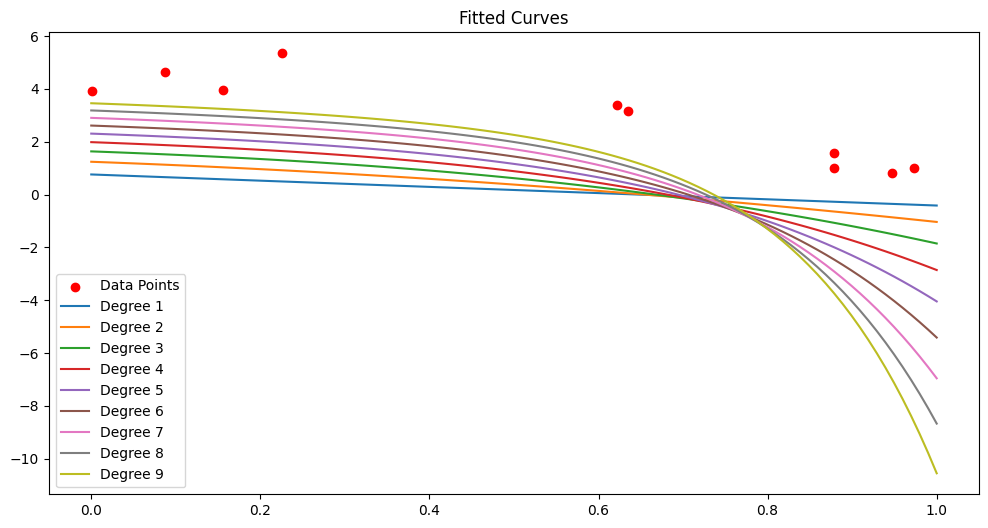

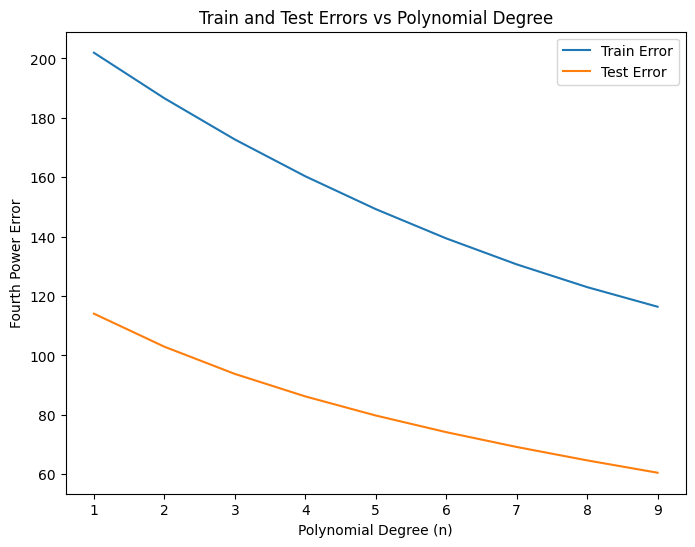

In [ ]:
# Ploting synthetic data and fitted curves
plt.figure(figsize=(12, 6))
plt.scatter(x, y, color='red', label='Data Points')
x_range = np.linspace(0, 1, 100)
for n in n_values:
    W, _, _ = fit_model(x_train, y_train, x_test, y_test, n)
    phi_range = phi(x_range, n)
    phi_range, mean, std = normalize_features(phi_range)
    phi_range = (phi_range - mean) / (std + 1e-8)  # Normalizing using training stats
    y_pred = np.dot(phi_range, W)
    plt.plot(x_range, y_pred, label=f'Degree {n}')
plt.legend()
plt.title('Fitted Curves')
plt.show()

# Plot train and test errors
plt.figure(figsize=(8, 6))
plt.plot(n_values, train_errors_all, label='Train Error')
plt.plot(n_values, test_errors_all, label='Test Error')
plt.xlabel('Polynomial Degree (n)')
plt.ylabel('Fourth Power Error')
plt.legend()
plt.title('Train and Test Errors vs Polynomial Degree')
plt.show()

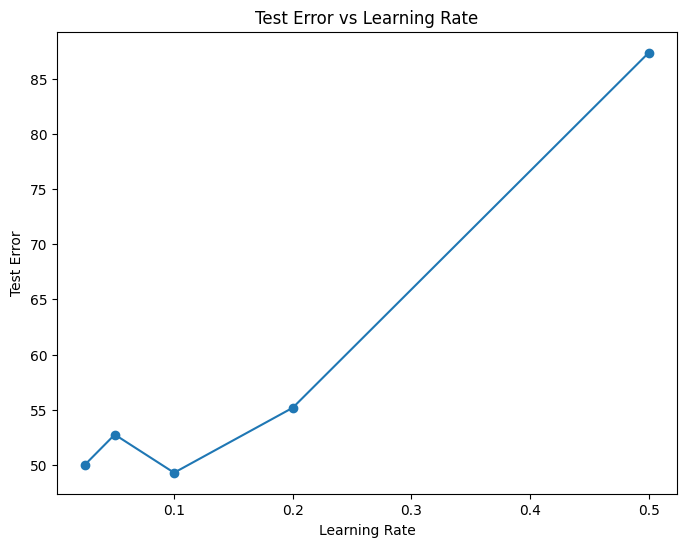

In [ ]:
learning_rates = [0.025, 0.05, 0.1, 0.2, 0.5]
test_errors_lr = []

for lr in learning_rates:
    _, _, test_errors = fit_model(x_train, y_train, x_test, y_test, n=5, lr=lr)
    test_errors_lr.append(test_errors[-1])

plt.figure(figsize=(8, 6))
plt.plot(learning_rates, test_errors_lr, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Test Error')
plt.title('Test Error vs Learning Rate')
plt.show()

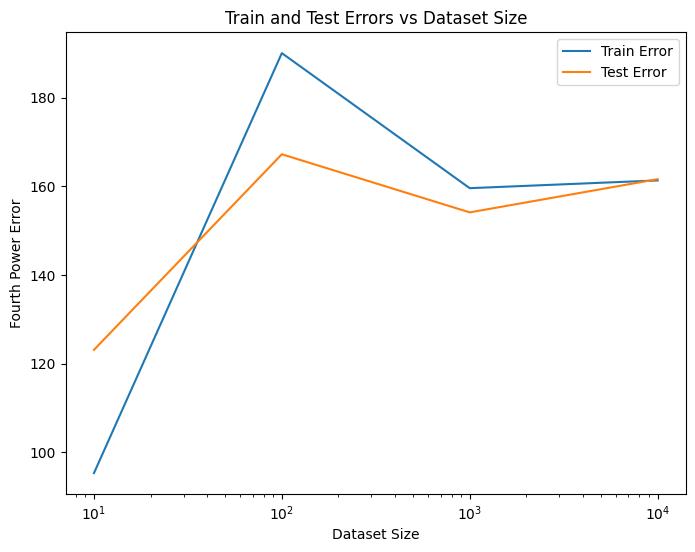

In [ ]:
# dataset_sizes = [10, 100, 1000, 10000]
# train_errors_size, test_errors_size = [], []

# for size in dataset_sizes:
#     x, y = generate_data(size)
#     x_train, y_train, x_test, y_test = train_test_split(x, y)
#     _, train_errors, test_errors = fit_model(x_train, y_train, x_test, y_test, n=5)
#     train_errors_size.append(train_errors[-1])
#     test_errors_size.append(test_errors[-1])

# plt.figure(figsize=(8, 6))
# plt.plot(dataset_sizes, train_errors_size, label='Train Error')
# plt.plot(dataset_sizes, test_errors_size, label='Test Error')
# plt.xscale('log')
# plt.xlabel('Dataset Size')
# plt.ylabel('Fourth Power Error')
# plt.legend()
# plt.title('Train and Test Errors vs Dataset Size')
# plt.show()
import numpy as np
import matplotlib.pyplot as plt

def standardize(x):
    mean = np.mean(x, axis=0)
    std = np.std(x, axis=0)
    return (x - mean) / (std + 1e-8)  # Adding small epsilon to avoid division by zero

dataset_sizes = [10, 100, 1000, 10000]
train_errors_size, test_errors_size = [], []

for size in dataset_sizes:
    x, y = generate_data(size)
    x_train, y_train, x_test, y_test = train_test_split(x, y)
    x_train = standardize(x_train)
    x_test = standardize(x_test)

    _, train_errors, test_errors = fit_model(x_train, y_train, x_test, y_test, n=5)

    train_errors_size.append(train_errors[-1])
    test_errors_size.append(test_errors[-1])

plt.figure(figsize=(8, 6))
plt.plot(dataset_sizes, train_errors_size, label='Train Error')
plt.plot(dataset_sizes, test_errors_size, label='Test Error')
plt.xscale('log')
plt.xlabel('Dataset Size')
plt.ylabel('Fourth Power Error')
plt.legend()
plt.title('Train and Test Errors vs Dataset Size')
plt.show()
